In [6]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
#Create path to data source CSV
csv_file = Path("../raw_data/Australian Vehicle Prices.csv")

# Read the CSV data into a DataFrame
#df = pd.read_csv("AustralianVehiclePrices.csv")
#df.head()
df = pd.read_csv(csv_file)
df.head()


#Create path to data source CSV
#csv_file = Path("../raw_data/Australian Vehicle Prices.csv")

#Read in csv information to DataFrame
#AUVehiclePrices_df = pd.read_csv(csv_file)

#Display DataFrame
#AUVehiclePrices_df

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


In [8]:
df.dtypes

Brand                 object
Year                 float64
Model                 object
Car/Suv               object
Title                 object
UsedOrNew             object
Transmission          object
Engine                object
DriveType             object
FuelType              object
FuelConsumption       object
Kilometres            object
ColourExtInt          object
Location              object
CylindersinEngine     object
BodyType              object
Doors                 object
Seats                 object
Price                 object
dtype: object

In [9]:
# Handle potential errors
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")

In [10]:
# Group data by brand and calculate average price
brand_avg_price = df.groupby("Brand")["Price"].mean().reset_index()
brand_avg_price.head()

,Brand,Price
0,Abarth,39934.666667
1,Alfa,24295.857143
2,Aston,284275.800000
3,Audi,51870.448802
4,BMW,51750.529289


In [11]:
# Sort by average price
#brand_avg_price = brand_avg_price.sort_values(by="Price", ascending=False)

In [12]:
# Count the total number of unique brands
total_brands = df["Brand"].nunique()

print("Total number of brands:", total_brands)

Total number of brands: 76


In [13]:
# Count occurrences of each brand
brand_counts = df["Brand"].value_counts()
brand_counts.head(10)

Brand
Toyota           2784
Hyundai          1239
Mazda            1179
Holden           1087
Ford             1055
Mitsubishi       1038
Nissan           1033
Volkswagen        891
Kia               809
Mercedes-Benz     623
Name: count, dtype: int64

In [14]:
# Create bar chart
#plt.figure(figsize=(12, 6))
#brand_counts.plot(kind="bar", color="teal")

#plt.xlabel("Brand")
#plt.ylabel("Number of Cars")
#plt.title("Number of Cars by Brand")

#plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
#plt.tight_layout()  # Adjust layout to avoid overlapping labels

# Save the figure
#plt.savefig("output_data/Total_Cars_by_Brand.png")

#plt.show()

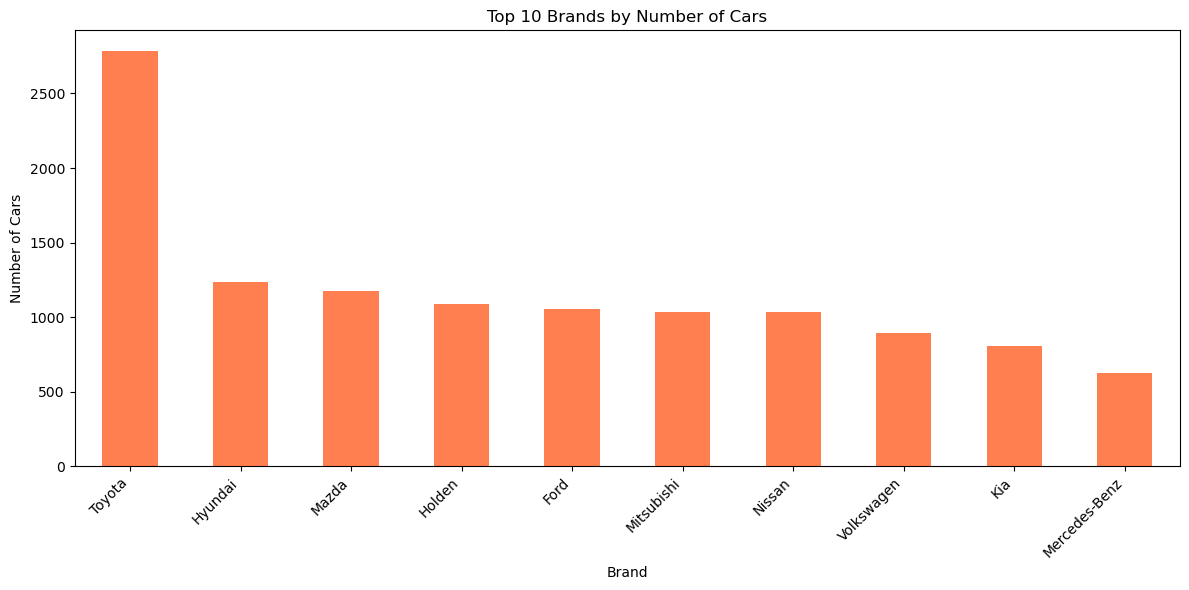

In [17]:
# Select top 10 brands
top_10_brands = brand_counts.head(10)

# Create bar chart for top 10 brands
plt.figure(figsize=(12, 6))
top_10_brands.plot(kind="bar", color="coral") 

plt.xlabel("Brand")
plt.ylabel("Number of Cars")
plt.title("Top 10 Brands by Number of Cars")

plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout for clarity

# Save the figure
plt.savefig("Top10Brands_BarChart.png")

plt.show()

In [18]:
# Select top 10 brands & get a list of the top 10 brand names
top_10_brands = brand_counts.head(10).index.to_list()

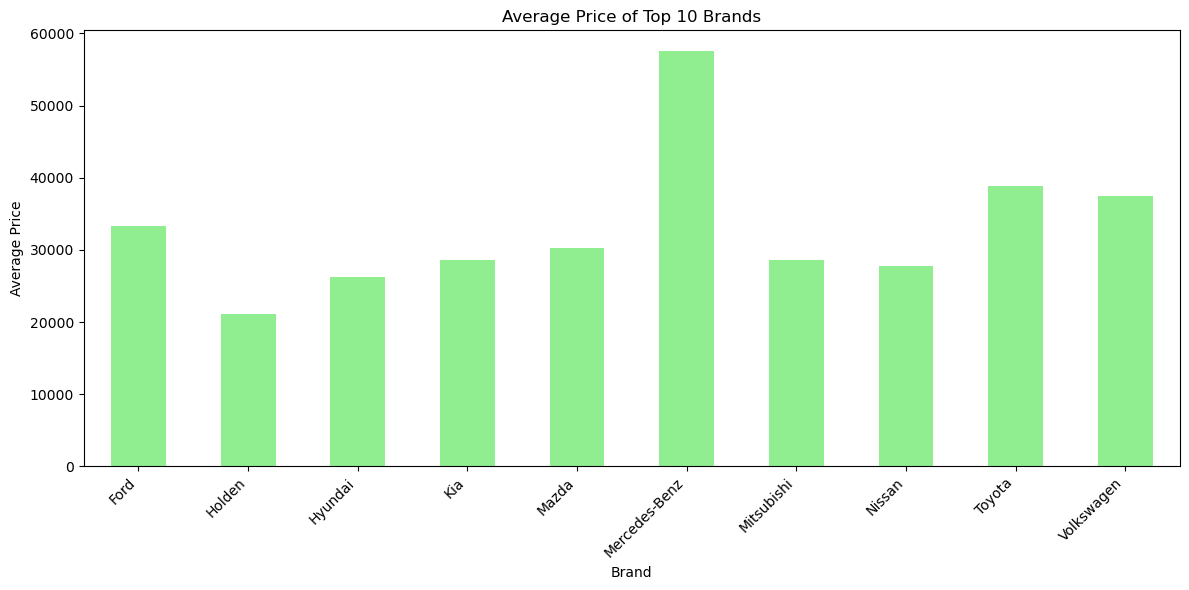

In [19]:
# Calculate average price for each of the top 10 brands
top_10_avg_prices = df[df["Brand"].isin(top_10_brands)].groupby("Brand")["Price"].mean()

# Create bar chart for average prices
plt.figure(figsize=(12, 6))
top_10_avg_prices.plot(kind="bar", color="lightgreen")  # Customize color if desired

plt.xlabel("Brand")
plt.ylabel("Average Price")
plt.title("Average Price of Top 10 Brands")

plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout for clarity

# Save the figure
plt.savefig("Top10Brands_AveragePrice_BarChart.png")

plt.show()

In [20]:
# Count the total number of unique Body Type
total_body_type = df["BodyType"].nunique()

print("Total number of Body Type:", total_body_type)

Total number of Body Type: 10


In [21]:
body_type_counts = df["BodyType"].value_counts()
body_type_counts.head()

BodyType
SUV           6907
Hatchback     2697
Ute / Tray    2512
Sedan         1983
Wagon         1232
Name: count, dtype: int64

In [22]:
#print(body_type_counts)

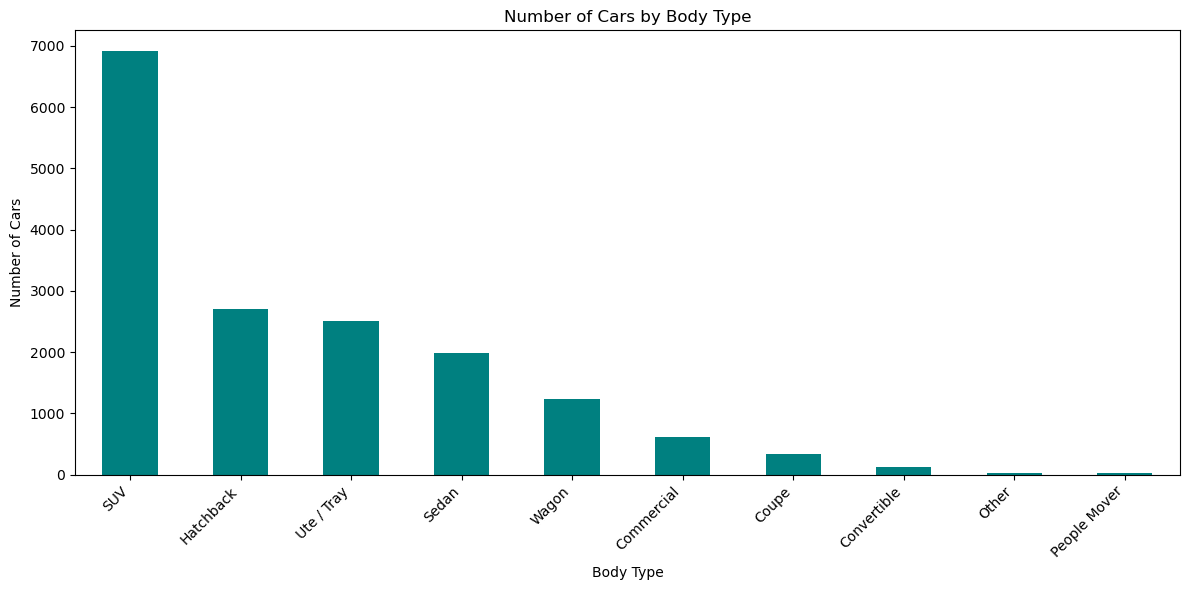

In [23]:
# Create bar chart
plt.figure(figsize=(12, 6))
body_type_counts.plot(kind="bar", color="teal")  # Customize color if desired

plt.xlabel("Body Type")
plt.ylabel("Number of Cars")
plt.title("Number of Cars by Body Type")

plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to avoid overlapping labels

# Save the figure
plt.savefig("AllBodyTypes_BarChart.png")

plt.show()

In [24]:
# Get a list of the Body Type
body_type_counts = body_type_counts.head(10).index.to_list()

In [25]:
# Calculate average price for each of the top 10 brands
top_10_avg_prices_bt = df[df["BodyType"].isin(body_type_counts)].groupby("BodyType")["Price"].mean()

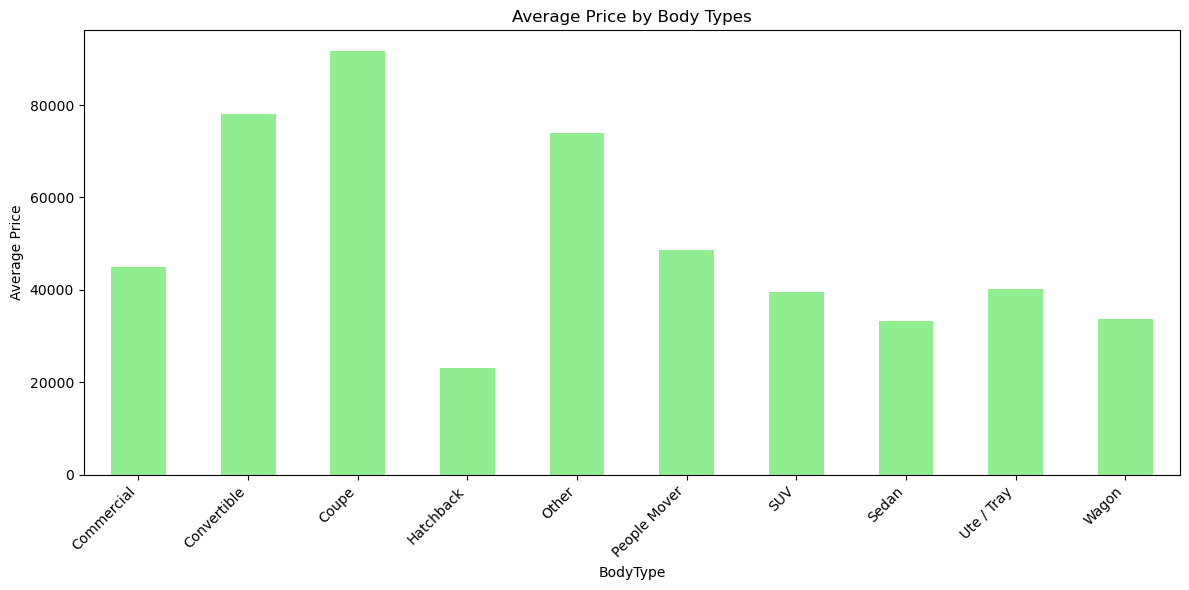

In [26]:
# Create bar chart for average prices
plt.figure(figsize=(12, 6))
top_10_avg_prices_bt.plot(kind="bar", color="lightgreen")  # Customize color if desired

plt.xlabel("BodyType")
plt.ylabel("Average Price")
plt.title("Average Price by Body Types")

plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout for clarity

# Save the figure
plt.savefig("AllBodyTypes_AveragePrice_BarChart.png")

plt.show()